# Programming assignment: bagging and random forest

In [1]:
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier 
from matplotlib import pyplot as plt
import seaborn
import numpy as np

In [2]:
df = load_digits()

In [3]:
X = df['data']
y = df['target']

### Задание 1

Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score. Эта величина и будет ответом в пункте 1.

In [4]:
clf = DecisionTreeClassifier()
cross_val_score(clf, X, y, cv=10).mean()

0.8269242706393545

### Задание 2

Воспользуйтесь BaggingClassifier, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100.

In [5]:
bag_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                     n_estimators=100).fit(X, y)

In [6]:
cross_val_score(bag_clf, X, y, cv=10).mean()

0.9237150837988828

### Задание 3

Изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на sqrt(d) случайных признаков. Качество работы получившегося классификатора - ответ в пункте 3. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. 

In [7]:
d = (X.shape[1])**0.5
d

8.0

In [8]:
bag_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), 
                        n_estimators=100, max_features=8).fit(X, y)

In [9]:
cross_val_score(bag_clf, X, y, cv=10).mean()

0.9293327126008689

### Задание 4

Сделать выбор случайных признаков не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. 

In [10]:
clf = DecisionTreeClassifier(max_features=8)
bag_clf = BaggingClassifier(base_estimator=clf, 
                        n_estimators = 100).fit(X, y)

In [11]:
cross_val_score(bag_clf, X, y, cv=10).mean()

0.9493606455617629

### Задание 5

Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier. Как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева?

In [12]:
forest_clf = RandomForestClassifier(n_estimators=200, max_features='sqrt', max_depth = 5)

In [13]:
cross_val_score(forest_clf, X, y, cv=10).mean()

0.9142799503414029

На основе наблюдений выпишите через пробел номера правильных утверждений из приведенных ниже в порядке возрастания номера (это будет ответ в п.5)

1) Случайный лес сильно переобучается с ростом количества деревьев (False)

2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев (True)

3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется. (True)

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция. (True)

5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно. (False)

6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается. (False)

7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга). (True)

#### Зависимость точности от количества деревьев|

In [14]:
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    clf = RandomForestClassifier(n_estimators = n, max_features = 8)
    scores.append(cross_val_score(clf, X, y, cv = 10).mean())

Text(0.5, 1.0, 'RandomForest score')

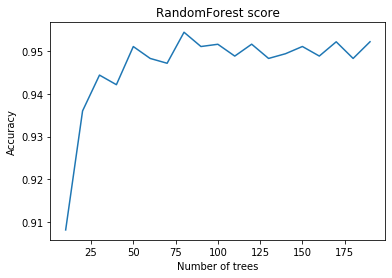

In [15]:
plt.plot(estimators, scores)
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.title('RandomForest score')

#### Зависимость точности от глубины деревьев

In [16]:
depth = np.arange(1, 50, 5)
scores = []
for n in depth:
    clf = RandomForestClassifier(n_estimators = 100, max_features = 8, max_depth = n)
    scores.append(cross_val_score(clf, X, y, cv = 10).mean())

Text(0.5, 1.0, 'RandomForest score')

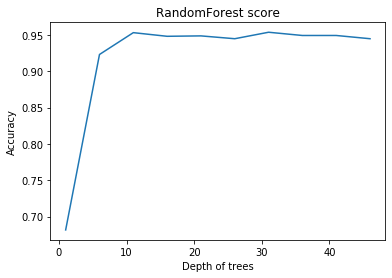

In [17]:
plt.plot(depth, scores)
plt.xlabel('Depth of trees')
plt.ylabel('Accuracy')
plt.title('RandomForest score')

#### Зависимость точности от количества признаков

In [18]:
num = np.arange(1, 20, 2)
scores = []
for n in num:
    clf = RandomForestClassifier(n_estimators = 100, max_features = n)
    scores.append(cross_val_score(clf, X, y, cv = 10).mean())

Text(0.5, 1.0, 'RandomForest score')

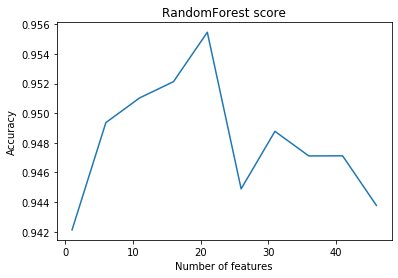

In [19]:
plt.plot(depth, scores)
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('RandomForest score')